In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [2]:
X, y = make_classification(n_samples = 10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99],
                          flip_y=0, random_state=4)
Counter(y)

Counter({0: 9900, 1: 100})

/opt/data/conda/envs/env-jupyter/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


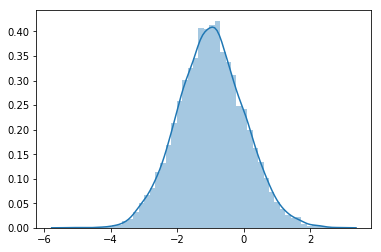

In [42]:
sns.distplot(X[:,0])

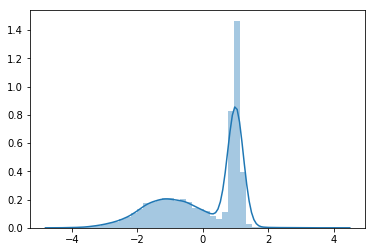

In [43]:
sns.distplot(X[:,1])

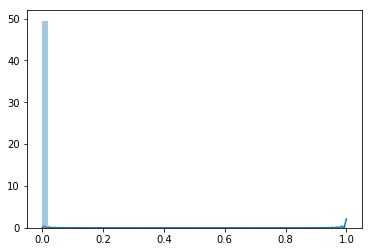

In [44]:
sns.distplot(y)

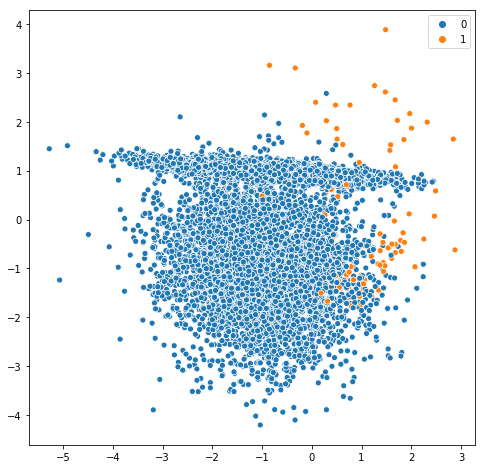

In [6]:
# Scatter plot
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(X[:,0], X[:,1], hue=y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6000, 2), (4000, 2), (6000,), (4000,))

In [12]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/opt/data/conda/envs/env-jupyter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/data/conda/envs/env-jupyter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/data/conda/envs/env-jupyter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/data/conda/envs/env-j

In [27]:
def define_model(n_input):
    model = Sequential()
    model.add(Dense(10, input_dim = n_input, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
    return model

In [28]:
from keras import backend as K
K.clear_session()

In [29]:
model = define_model(X_train.shape[1])
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
6000/6000 [==============================] - 1s 187us/step - loss: 0.6950 - acc: 0.6960
Epoch 2/100
6000/6000 [==============================] - 0s 50us/step - loss: 0.2698 - acc: 0.8575
Epoch 3/100
6000/6000 [==============================] - 0s 49us/step - loss: 0.1240 - acc: 0.9782
Epoch 4/100
6000/6000 [==============================] - 0s 51us/step - loss: 0.0785 - acc: 0.9892
Epoch 5/100
6000/6000 [==============================] - 0s 58us/step - loss: 0.0620 - acc: 0.9892
Epoch 6/100
6000/6000 [==============================] - 0s 53us/step - loss: 0.0549 - acc: 0.9892
Epoch 7/100
6000/6000 [==============================] - 0s 54us/step - loss: 0.0510 - acc: 0.9892
Epoch 8/100
6000/6000 [==============================] - 0s 56us/step - loss: 0.0485 - acc: 0.9892
Epoch 9/100
6000/6000 [==============================] - 0s 50us/step - loss: 0.0467 - acc: 0.9892
Epoch 10/100
6000/6000 [==============================] - 0s 51us/step - loss: 0.0453 - acc: 0.9892
Epoch 11

6000/6000 [==============================] - 1s 116us/step - loss: 0.0294 - acc: 0.9907
Epoch 84/100
6000/6000 [==============================] - 1s 110us/step - loss: 0.0294 - acc: 0.9907
Epoch 85/100
6000/6000 [==============================] - 0s 56us/step - loss: 0.0293 - acc: 0.9905
Epoch 86/100
6000/6000 [==============================] - 0s 50us/step - loss: 0.0292 - acc: 0.9908
Epoch 87/100
6000/6000 [==============================] - 0s 50us/step - loss: 0.0292 - acc: 0.9907
Epoch 88/100
6000/6000 [==============================] - 0s 54us/step - loss: 0.0291 - acc: 0.9907
Epoch 89/100
6000/6000 [==============================] - 0s 54us/step - loss: 0.0291 - acc: 0.9910
Epoch 90/100
6000/6000 [==============================] - 0s 53us/step - loss: 0.0291 - acc: 0.9907
Epoch 91/100
6000/6000 [==============================] - 0s 51us/step - loss: 0.0291 - acc: 0.9908
Epoch 92/100
6000/6000 [==============================] - 0s 56us/step - loss: 0.0290 - acc: 0.9908
Epoch 93/10

In [30]:
y_hat = model.predict(X_test)
roc_auc_score(y_test, y_hat)

0.9578454332552693

In [36]:
print ("Precision",precision_score(y_test, np.round(y_hat)))
print ("Recall"   ,recall_score(y_test, np.round(y_hat)))
print ("Accuracy",accuracy_score(y_test, np.round(y_hat)))

Precision 1.0
Recall 0.17142857142857143
Accuracy 0.99275


In [41]:
X.shape

(10000, 2)

### Cost Sensitive Training
A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset.

In [53]:
def define_cost_model(n_input):
    K.clear_session()
    
    weights = {0:1, 1:150}
    model = Sequential()
    model.add(Dense(10, input_dim = n_input, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
    return model

Fractions that represent the same ratio do not have the same effect. For example, using 0.01 and 0.99 for the majority and minority classes respectively may result in worse performance than using 1 and 100 (it does in this case).

In [57]:
model = define_cost_model(X_train.shape[1])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 2.9006 - acc: 0.2982
Epoch 2/100
 - 0s - loss: 1.0028 - acc: 0.4417
Epoch 3/100
 - 0s - loss: 0.3503 - acc: 0.8520
Epoch 4/100
 - 0s - loss: 0.2017 - acc: 0.9882
Epoch 5/100
 - 0s - loss: 0.1448 - acc: 0.9893
Epoch 6/100
 - 0s - loss: 0.1121 - acc: 0.9892
Epoch 7/100
 - 0s - loss: 0.0898 - acc: 0.9892
Epoch 8/100
 - 0s - loss: 0.0745 - acc: 0.9892
Epoch 9/100
 - 0s - loss: 0.0648 - acc: 0.9892
Epoch 10/100
 - 0s - loss: 0.0587 - acc: 0.9892
Epoch 11/100
 - 0s - loss: 0.0548 - acc: 0.9892
Epoch 12/100
 - 0s - loss: 0.0521 - acc: 0.9892
Epoch 13/100
 - 0s - loss: 0.0500 - acc: 0.9892
Epoch 14/100
 - 0s - loss: 0.0484 - acc: 0.9892
Epoch 15/100
 - 0s - loss: 0.0471 - acc: 0.9892
Epoch 16/100
 - 0s - loss: 0.0459 - acc: 0.9892
Epoch 17/100
 - 0s - loss: 0.0449 - acc: 0.9892
Epoch 18/100
 - 0s - loss: 0.0441 - acc: 0.9892
Epoch 19/100
 - 0s - loss: 0.0434 - acc: 0.9892
Epoch 20/100
 - 0s - loss: 0.0427 - acc: 0.9892
Epoch 21/100
 - 0s - loss: 0.0422 - acc: 0.9892
E

In [55]:
y_hat = model.predict(X_test)
roc_auc_score(y_test, y_hat)

0.9535507115834985

In [56]:
print ("Precision",precision_score(y_test, np.round(y_hat)))
print ("Recall"   ,recall_score(y_test, np.round(y_hat)))
print ("Accuracy",accuracy_score(y_test, np.round(y_hat)))

Precision 0.9090909090909091
Recall 0.2857142857142857
Accuracy 0.9935
